<a href="https://colab.research.google.com/github/Mrkomiljon/google-colab-/blob/main/yakuniyAmaliyot_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 4-MODUL. VIZUALIZASIYA

## Yakuniy amaliyot. `matplotlib`


In [44]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

XYZ kompaniyasi taxminan 4000 ishchi xodim ishlaydi va afsuski har yili xodimlarning 15% ga yaqini o'z xohishlari bilan yoki kompaniya tomonidan ishdan bo'shatiladi va yana yangi xodim ishga olinadi. Bu esa kompaniya uchun bir qancha noqulayliklar tug'diradi (loyihalar sekinlashishi, ishga qabul qilish jarayoni uzoqligi, yangi ishchi ko'nikishi uchun treninglar va ma'lum vaqt kerakligi). Ishchilarni saqlab qolish uchun kompaniya HR tahlil qilib ko'rishga qaror qildi va quyidagi datasetdan foydalanib, qanday faktorlar ishchilarni bo'shashiga sabab bo'lishini tahlil qilishgan.
Dataset ustun nomlari:

1.   Age - yoshi
2.   Attrition - ishdan bo'shaganmi
3.   BusinessTravel - komandirovka
4.   DistanceFromHome - uydan ishgacha bo'lgan masofa (km)
5.   Education - Ta'lim
6.   Gender - jinsi
7.   MaritalStatus - oilaviy holati


<a href="https://ibb.co/sR5zPJV"><img src="https://i.ibb.co/g9vh7FR/hr.png" alt="hr" border="0" style="width:100%"></a>


In [ ]:
#@title QUYIDAGI KODGA TEGMANG!!! 
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

## 1-VAZIFA: Quyidagi CSV fayl linkidan foydalaning 
### - va ma'lumotlarni "data" nomli o'zgaruvchiga biriktiring 
### - hamda 'EmployeeCount','EmployeeID','StandardHours' ustunlari ortiqchaligi sababli o'chirib tashlang

### LINK: https://raw.githubusercontent.com/mukhammad-irmatov/health_dataset/main/hr_dataset.csv

In [45]:
data=pd.read_csv('https://raw.githubusercontent.com/mukhammad-irmatov/health_dataset/main/hr_dataset.csv')
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [46]:
data.drop(['EmployeeCount', 'EmployeeID', 'StandardHours'],axis=1, inplace=True)


In [47]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,Y,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,Y,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,Y,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,Y,12,2,9.0,2,6,0,4


## 2-VAZIFA: Qaysi ustunlarda nechtadan null qiymatlar borligini aniqlang
### - o'sha ustunlardagi kataklarni 0 qiymati bilan to'ldiring.


In [48]:
data.fillna({'NumCompaniesWorked':0}, inplace=True)
data.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,Y,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,Y,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,Y,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,Y,12,2,9.0,2,6,0,4


In [49]:
data.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          9
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

## 3-VAZIFA: Barcha ustunlardagi o'zaro korrelatsiyasini aniqlang
### - hamda heatmap orqali 16:10 o'lchamda ekranga chiqaring 


In [50]:
data.corr()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.006963,-0.035706,-0.002884,-0.044314,0.299297,-0.033137,-0.031753,0.680661,-0.027308,0.311309,0.216513,0.202089
DistanceFromHome,0.006963,1.000000,-0.008638,-0.037329,-0.021607,-0.012617,0.038125,0.011169,0.009374,-0.009001,0.031684,0.002290,0.021584
Education,-0.035706,-0.008638,1.000000,0.045746,0.006410,-0.016096,-0.040531,0.001261,-0.010717,0.010472,0.006080,0.022490,0.005358
JobLevel,-0.002884,-0.037329,0.045746,1.000000,0.047316,-0.010877,0.010973,0.000993,-0.036957,-0.032500,-0.064219,-0.060811,-0.055251
MonthlyIncome,-0.044314,-0.021607,0.006410,0.047316,1.000000,-0.019915,0.004325,0.026930,-0.033787,0.050112,0.000995,0.065219,0.024304
NumCompaniesWorked,0.299297,-0.012617,-0.016096,-0.010877,-0.019915,1.000000,0.031683,0.017685,0.239228,-0.032123,-0.116322,-0.035421,-0.108223
PercentSalaryHike,-0.033137,0.038125,-0.040531,0.010973,0.004325,0.031683,1.000000,0.012548,-0.018736,-0.037392,-0.029707,-0.029542,-0.040864
StockOptionLevel,-0.031753,0.011169,0.001261,0.000993,0.026930,0.017685,0.012548,1.000000,0.002694,-0.069902,0.007886,0.019063,0.017757
TotalWorkingYears,0.680661,0.009374,-0.010717,-0.036957,-0.033787,0.239228,-0.018736,0.002694,1.000000,-0.040762,0.627703,0.404444,0.458800
TrainingTimesLastYear,-0.027308,-0.009001,0.010472,-0.032500,0.050112,-0.032123,-0.037392,-0.069902,-0.040762,1.000000,-0.007894,0.016121,-0.013270


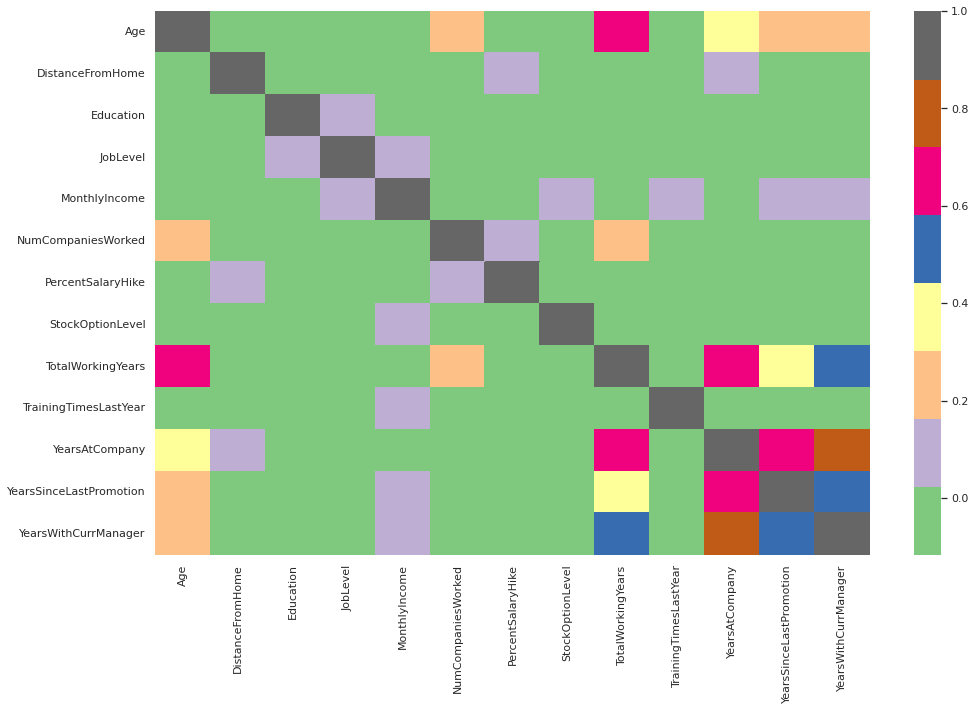

In [56]:
plt.figure(figsize=(16,10))
sns.heatmap(data=data.corr(), cmap='Accent')
plt.show()

## 4-VAZIFA: Dataset uzunligini toping, ya'ni umumiy nechta qator(row) dan tashkil topgan
#### - Attrition(ishdan bo'shaganmi) ustunidagi "Yes" deb javob berilgan qatorlar soni
#### - Attrition(ishdan bo'shaganmi) ustunidagi "No" deb javob berilgan qatorlar soni
#### - Attrition(ishdan bo'shaganmi) ustunidagi "Yes" deb javob berilgan qatorlar soni umumiy datasetning necha fozini tashkil etadi
#### - Attrition(ishdan bo'shaganmi) ustunidagi "No" deb javob berilgan qatorlar soni umumiy datasetning necha fozini tashkil etadi

**Hint:** har birini ekranga chiqarish uchun print dan foydalaning


<a href="https://imgbb.com/"><img src="https://i.ibb.co/28VjRyB/img.png" alt="img" border="0"></a>

In [66]:
print(f"{len(data)}")
print(f"{len(data[data['Attrition']=='Yes'])}")
print(f"{len(data[data['Attrition']=='No'])}")
print(f"Yes: {(len(data[data['Attrition']=='Yes'])/(len(data))*100)} % ni tashkil qiladi")
print(f"No: {(len(data[data['Attrition']=='No'])/(len(data))*100)} % ni tashkil qiladi")

4410
711
3699
Yes: 16.122448979591837 % ni tashkil qiladi
No: 83.87755102040816 % ni tashkil qiladi


## 5-VAZIFA: Countplot() orqali Attrition ustunidagi ma'lumotlarni "Yes" "No" soniga ko'ra, ustunli grafik shaklida tasvirlang

<a href="https://imgbb.com/"><img src="https://i.ibb.co/Px9Bn6J/plt.png" alt="plt" border="0"></a>

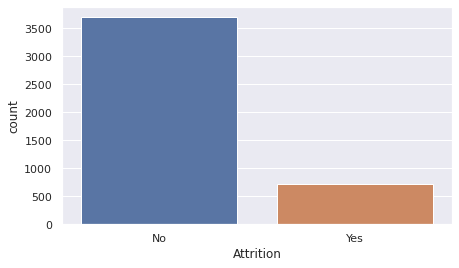

In [72]:
plt.figure(figsize=(7,4))
sns.countplot(x='Attrition', data=data)
plt.show()


## 6-VAZIFA: Countplot() orqali Attrition ustunidagi ma'lumotlarni "Yes" "No" soniga ko'ra hamda gender ustuniga bo'lingan holda ustunli grafikda tasvirlang.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/R7BC8z2/bygender.png" alt="bygender" border="0"></a>

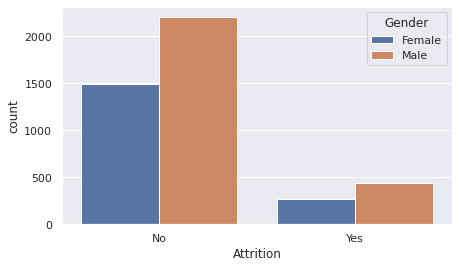

In [73]:
plt.figure(figsize=(7,4))
sns.countplot(x='Attrition', hue='Gender', data=data)
plt.show()


## 7-VAZIFA: Countplot() orqali Attrition ustunidagi ma'lumotlarni "Yes" "No" soniga ko'ra hamda jobLevel ustuniga bo'lingan holda ustunli grafikda tasvirlang.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/kmzVfDK/byjoblevel.png" alt="byjoblevel" border="0"></a><br /><a target='_blank' href='https://the-crosswordsolver.com/tobagos-island-neighbor-8-letters'></a><br />

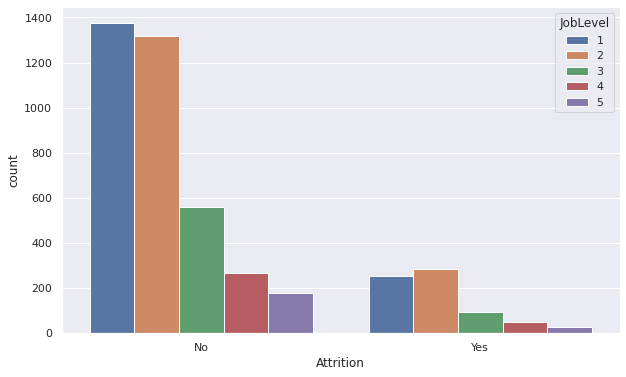

In [77]:
plt.figure(figsize=(10,6))
sns.countplot(x='Attrition', hue='JobLevel', data=data)
plt.show()



## 8-VAZIFA: Pie chart orqali "Attrition" (ishdan bo'shaganmi) ustunidagi Yes va No qiymatlariga ko'ra grafikni chiqaring

<a href="https://imgbb.com/"><img src="https://i.ibb.co/LZ4cCKb/PieChart.png" alt="PieChart" border="0"></a><br /><a target='_blank' href='https://the-crosswordsolver.com/netman-smith-4-letters'></a><br />

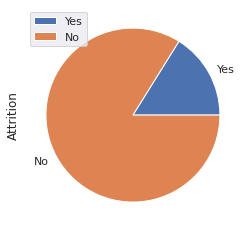

In [89]:
df = pd.DataFrame({'Attrition': [711, 3699],
                   },
                  index=['Yes', 'No'])
plot = df.plot.pie(y='Attrition', figsize=(4, 4))

## 9-VAZIFA:  Crosstab orqali "Attrition" (ishdan bo'shaganmi) ustunidagi Yes va No qiymatlari hamda Department ustuniga ko'ra grafikni chiqaring

<a href="https://imgbb.com/"><img src="https://i.ibb.co/g4KgG6q/depart.png" alt="depart" border="0"></a>

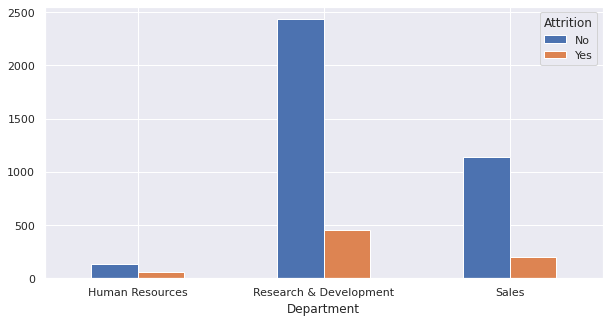

In [111]:
crosstb = pd.crosstab(data.Department, data.Attrition)
pl = crosstb.plot(kind="bar", stacked=False, rot=0, figsize=(10,5))# stacked= True bulsa ustma-ust buladi

## 10-VAZIFA:  Seaborn kutubxonasining Distribution(taqsimot) imkoniyatidan foydalanib, Attrition(ishdan bo'shaganmi) ustunini MonthlyIncome ustuniga solishtirilganligini grafigini ekranga chiqaring.


**Hint: ** Bu orqali biz ishchining oylik maoshini uning ishdan bo'shab ketishiga bog'liq yoki bog'liq emasligini topamiz.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/zQc4FVZ/displot.png" alt="displot" border="0"></a><br /><a target='_blank' href='https://500pxdownload.com/'></a><br />

<Figure size 720x360 with 0 Axes>

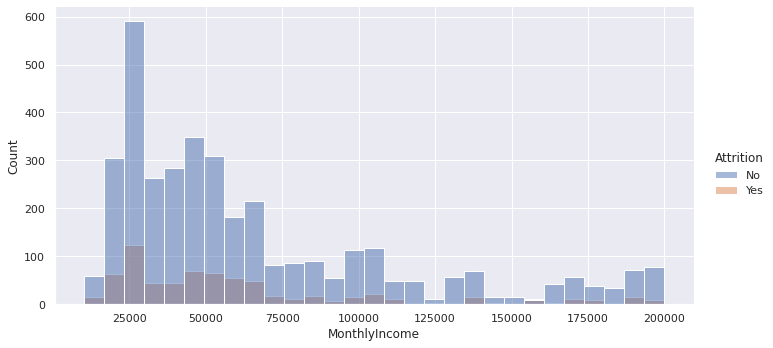

In [109]:
plt.figure(figsize=(10,5))
sns.displot(data=data, x='MonthlyIncome', hue='Attrition', color='r', height=5, aspect=2)
plt.grid(which='minor')
plt.show() 